<a href="https://colab.research.google.com/github/DeepanjanSaha-INDIA/Neural_network_Iris_Dataset/blob/master/Iris_tensorflow_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset from Google Drive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = "https://drive.google.com/open?id=13iCRKXM3UF1rWsLmvweWGqhf6T7FHvNp"
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

13iCRKXM3UF1rWsLmvweWGqhf6T7FHvNp


In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv', header = None, names = ["f1", "f2", "f3", "f4", "label"])

print("Top 5 rows of dataset")
print(df.head())

print("Shape of dataset: {}".format(df.shape))
# Dataset is now stored in a Pandas Dataframe

Top 5 rows of dataset
    f1   f2   f3   f4        label
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
Shape of dataset: (150, 5)


# Shuffling of dataset rows (Not required as it is done in Test-Train-Split)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

print(df.head(10))

    f1   f2   f3   f4            label
0  5.7  2.8  4.1  1.3  Iris-versicolor
1  6.4  2.8  5.6  2.2   Iris-virginica
2  4.4  2.9  1.4  0.2      Iris-setosa
3  5.7  2.8  4.5  1.3  Iris-versicolor
4  7.1  3.0  5.9  2.1   Iris-virginica
5  6.3  2.5  5.0  1.9   Iris-virginica
6  5.7  4.4  1.5  0.4      Iris-setosa
7  5.8  2.7  5.1  1.9   Iris-virginica
8  5.1  3.8  1.5  0.3      Iris-setosa
9  7.7  2.8  6.7  2.0   Iris-virginica


# Plot feature of Pandas Library

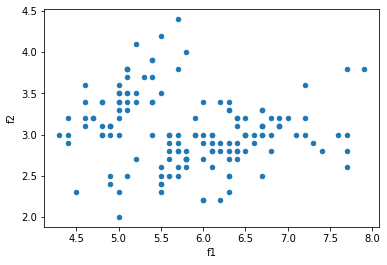

In [6]:
df.plot("f1", "f2", kind = "scatter")

# Creating feature set (x) and label set (y) if it does not exist

In [7]:
if 'y' not in globals():
  # x = df[["f1", "f2", "f3", "f4"]]
  # y = df["label"]

  y_label = df.pop("label")
  x = df.copy()
  print("shape of x: {} and y: {}".format(x.shape, y_label.shape))

shape of x: (150, 4) and y: (150,)


# Data analysis

In [8]:
x.describe()

,f1,f2,f3,f4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
x.head()

,f1,f2,f3,f4
0,5.7,2.8,4.1,1.3
1,6.4,2.8,5.6,2.2
2,4.4,2.9,1.4,0.2
3,5.7,2.8,4.5,1.3
4,7.1,3.0,5.9,2.1


In [10]:
print("First element:\n{}".format(x.loc[0]))

First element:
f1    5.7
f2    2.8
f3    4.1
f4    1.3
Name: 0, dtype: float64


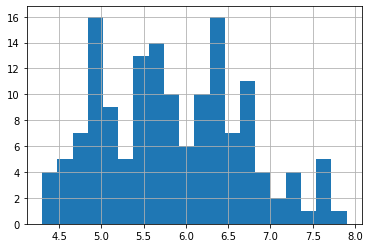

In [11]:
x.f1.hist(bins = 20)

In [12]:
print("Total categorical labels: {}".format(np.unique(y_label)))

Total categorical labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Test-Train-Split

In [13]:
x_train, x_test, y_train_label, y_test_label = train_test_split(x, y_label)

print("Shape data: ", x_train.shape, x_test.shape, y_train_label.shape, y_test_label.shape)
print("Total categorical labels with count: {}".format(np.unique(y_train_label, return_counts = True)))

Shape data:  (112, 4) (38, 4) (112,) (38,)
Total categorical labels with count: (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([39, 39, 34]))


# Feature normalisation and Categorical label encoding

In [0]:
scaler = MinMaxScaler()
gle = LabelEncoder()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = gle.fit_transform(y_train_label)
y_test = gle.transform(y_test_label)

print("Label mapping: {}".format({index: label for index, label in enumerate(gle.classes_)}))

Label mapping: {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


# Data visualisations

Text(0.5, 1.0, 'PLot Feature 0 vs 1')

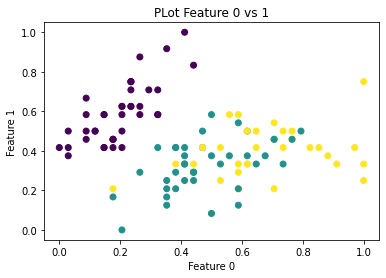

In [16]:
plt.scatter(x = x_train[:,0], y = x_train[:,1], c = y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("PLot Feature 0 vs 1")

Text(0.5, 1.0, 'PLot Feature 2 vs 3')

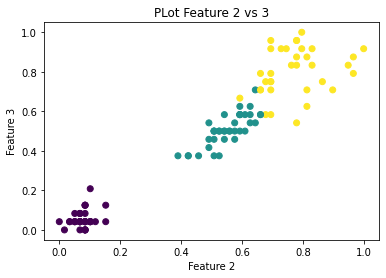

In [17]:
plt.scatter(x = x_train[:,2], y = x_train[:,3], c = y_train)
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.title("PLot Feature 2 vs 3")

# Creating the Neural Network model

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 12, activation = tf.keras.activations.relu, input_shape = (4,)))
model.add(tf.keras.layers.Dense(units = 6, activation = tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(units = 3, activation= tf.keras.activations.softmax))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 21        
Total params: 159
Trainable params: 159
Non-trainable params: 0
_________________________________________________________________


# Training model

In [29]:
model.fit(x = x_train, y = y_train, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0970 - sparse_categorical_accuracy: 0.3125
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0871 - sparse_categorical_accuracy: 0.3125
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0749 - sparse_categorical_accuracy: 0.3571
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0642 - sparse_categorical_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0497 - sparse_categorical_accuracy: 0.5268
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0374 - sparse_categorical_accuracy: 0.5982
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0375 - sparse_categorical_accuracy: 0.6339
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0276 - sparse_categorical_accuracy: 0.6518
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1

# Manual testing for first test element

In [30]:
print(model.predict(np.array([x_test[0]])))
print(y_test[0])

[[0.0118818 0.3777976 0.6103206]]
2


# Model evaluation on test set

In [31]:
loss, accuracy = model.evaluate(x = x_test, y = y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4601 - sparse_categorical_accuracy: 0.9211


In [32]:
print("Accuracy is: {}".format(accuracy))

Accuracy is: 0.9210526347160339


# Saving the model

In [0]:
model.save("Iris_trained.h5")